In [1]:
import pandas_datareader.data as pdr
import datetime as dt

In [2]:
start = dt.datetime(2020, 1, 1)
end = dt.datetime(2021, 12, 31)


In [3]:
api_key = '65a541c43231b61795cf530b309641945d95410d'

In [4]:
df = pdr.DataReader('AAPL', 'tiingo', start=start, end=end, api_key=api_key)

C:\Users\91930\AppData\Local\Temp\ipykernel_7884\3317228597.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.DataReader('AAPL', 'tiingo', start=start, end=end, api_key=api_key)


In [5]:
print(df.head())

                                   close    high     low    open    volume  \
symbol date                                                                  
AAPL   2020-01-02 00:00:00+00:00  300.35  300.60  295.19  296.24  33911864   
       2020-01-03 00:00:00+00:00  297.43  300.58  296.50  297.15  36633878   
       2020-01-06 00:00:00+00:00  299.80  299.96  292.75  293.79  29644644   
       2020-01-07 00:00:00+00:00  298.39  300.90  297.48  299.84  27877655   
       2020-01-08 00:00:00+00:00  303.19  304.44  297.16  297.16  33090946   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2020-01-02 00:00:00+00:00  73.448805  73.509942  72.186958  72.443729   
       2020-01-03 00:00:00+00:00  72.734737  73.505051  72.507311  72.666265   
       2020-01-06 00:00:00+00:00  73.314306  73.353433  71.590271  71.844597   
       2020-01-07 00:00:00+00:00  72.969499  73.58330

In [6]:
df.tail()

close    high     low     open    volume  \
symbol date                                                                   
AAPL   2021-12-27 00:00:00+00:00  180.33  180.42  177.07  177.085  74919582   
       2021-12-28 00:00:00+00:00  179.29  181.33  178.53  180.160  79144339   
       2021-12-29 00:00:00+00:00  179.38  180.63  178.14  179.330  62348931   
       2021-12-30 00:00:00+00:00  178.20  180.57  178.09  179.470  59773014   
       2021-12-31 00:00:00+00:00  177.57  179.23  177.26  178.085  61661433   

                                    adjClose     adjHigh      adjLow  \
symbol date                                                            
AAPL   2021-12-27 00:00:00+00:00  179.016718  179.106063  175.780460   
       2021-12-28 00:00:00+00:00  177.984292  180.009436  177.229827   
       2021-12-29 00:00:00+00:00  178.073637  179.314533  176.842667   
       2021-12-30 00:00:00+00:00  176.902230  179.254970  176.793031   
       2021-12-31 00:00:00+00:00  176.276818  177.924729  175.969076   

                                     adjOpen  adjVolume  divCash  splitFactor  
symbol date                                                                    
AAPL   2021-12-27 00:00:00+00:00  175.795350   74919582      0.0          1.0  
       2021-12-28 00:00:00+00:00  178.847956   79144339      0.0          1.0  
       2021-12-29 00:00:00+00:00  178.024001   62348931      0.0          1.0  
       2021-12-30 00:00:00+00:00  178.162981   59773014      0.0          1.0  
       2021-12-31 00:00:00+00:00  176.788068   61661433      0.0          1.0

In [7]:
df1=df.reset_index()['high']

In [8]:
df1.shape

(505,)

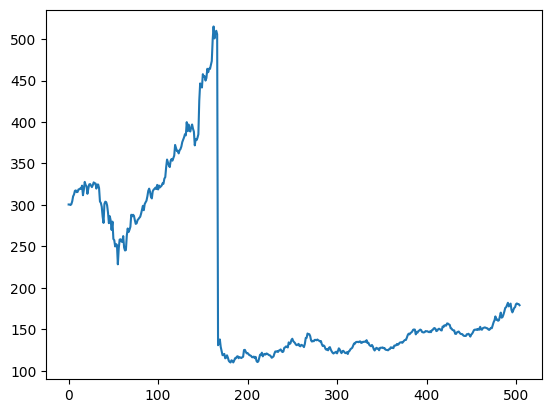

In [9]:
import matplotlib.pyplot as plt
plt.plot(df1)



In [10]:
import numpy as np

In [11]:

from sklearn.preprocessing import MinMaxScaler

data = np.array([1, 2, 3, 4, 5], dtype=float) # Replace with your actual data
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(data.reshape(-1, 1))


In [12]:
df1

array([[0.  ],
       [0.25],
       [0.5 ],
       [0.75],
       [1.  ]])

In [13]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df1, test_size=0.65, shuffle=False)


In [14]:
import numpy

In [15]:
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data)-time_step):
        X.append(data[i:i+time_step])
        Y.append(data[i+time_step])
    return np.array(X), np.array(Y)

In [16]:
data = np.random.randn(1000)
train_data = data[:700]
test_data = data[700:]

time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [17]:
print(x_train)

[[ 0.73725995 -0.7052087   0.29802149 ...  0.70440024  0.11835899
   0.62464673]
 [-0.7052087   0.29802149  0.28227343 ...  0.11835899  0.62464673
  -0.96234589]
 [ 0.29802149  0.28227343  1.21424429 ...  0.62464673 -0.96234589
  -0.27485453]
 ...
 [-0.12444873  0.16356605 -1.19070373 ... -1.0135257   0.12309575
   1.45698061]
 [ 0.16356605 -1.19070373 -0.41538512 ...  0.12309575  1.45698061
  -1.49644909]
 [-1.19070373 -0.41538512  1.03673552 ...  1.45698061 -1.49644909
   0.67282777]]


In [18]:
print(x_test.shape)

(200, 100)


In [19]:
print(y_test.shape)

(200,)


In [20]:
print(x_train.shape)

(600, 100)


In [21]:
print(y_train.shape)

(600,)


In [22]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
x_train[:100]

array([[[ 0.73725995],
        [-0.7052087 ],
        [ 0.29802149],
        ...,
        [ 0.70440024],
        [ 0.11835899],
        [ 0.62464673]],

       [[-0.7052087 ],
        [ 0.29802149],
        [ 0.28227343],
        ...,
        [ 0.11835899],
        [ 0.62464673],
        [-0.96234589]],

       [[ 0.29802149],
        [ 0.28227343],
        [ 1.21424429],
        ...,
        [ 0.62464673],
        [-0.96234589],
        [-0.27485453]],

       ...,

       [[ 0.70440024],
        [ 0.11835899],
        [ 0.62464673],
        ...,
        [ 0.74231859],
        [ 1.61465831],
        [ 0.10760164]],

       [[ 0.11835899],
        [ 0.62464673],
        [-0.96234589],
        ...,
        [ 1.61465831],
        [ 0.10760164],
        [ 0.01509296]],

       [[ 0.62464673],
        [-0.96234589],
        [-0.27485453],
        ...,
        [ 0.10760164],
        [ 0.01509296],
        [-1.55399229]]])

In [27]:
model.fit(x_train, y_train, epochs=100, batch_size=64, verbose=1, validation_data=(x_test, y_test))


Epoch 1/100
10/10 [==============================] - 18s 655ms/step - loss: 0.9676 - val_loss: 0.8721
Epoch 2/100
10/10 [==============================] - 3s 348ms/step - loss: 0.9629 - val_loss: 0.8708
Epoch 3/100
10/10 [==============================] - 3s 335ms/step - loss: 0.9624 - val_loss: 0.8706
Epoch 4/100
10/10 [==============================] - 3s 334ms/step - loss: 0.9619 - val_loss: 0.8680
Epoch 5/100
10/10 [==============================] - 3s 334ms/step - loss: 0.9620 - val_loss: 0.8673
Epoch 6/100
10/10 [==============================] - 3s 333ms/step - loss: 0.9619 - val_loss: 0.8671
Epoch 7/100
10/10 [==============================] - 3s 335ms/step - loss: 0.9618 - val_loss: 0.8687
Epoch 8/100
10/10 [==============================] - 3s 332ms/step - loss: 0.9621 - val_loss: 0.8703
Epoch 9/100
10/10 [==============================] - 3s 333ms/step - loss: 0.9607 - val_loss: 0.8700
Epoch 10/100
10/10 [==============================] - 3s 339ms/step - loss: 0.9625 - val_l

10/10 [==============================] - 3s 336ms/step - loss: 0.8318 - val_loss: 0.9142
Epoch 82/100
10/10 [==============================] - 3s 326ms/step - loss: 0.8302 - val_loss: 0.9986
Epoch 83/100
10/10 [==============================] - 3s 336ms/step - loss: 0.9420 - val_loss: 0.9015
Epoch 84/100
10/10 [==============================] - 3s 340ms/step - loss: 0.8728 - val_loss: 0.9274
Epoch 85/100
10/10 [==============================] - 3s 338ms/step - loss: 0.8689 - val_loss: 0.9142
Epoch 86/100
10/10 [==============================] - 3s 327ms/step - loss: 0.8539 - val_loss: 0.9850
Epoch 87/100
10/10 [==============================] - 3s 333ms/step - loss: 0.8649 - val_loss: 0.9874
Epoch 88/100
10/10 [==============================] - 3s 300ms/step - loss: 0.8423 - val_loss: 1.0077
Epoch 89/100
10/10 [==============================] - 3s 339ms/step - loss: 0.8325 - val_loss: 1.0203
Epoch 90/100
10/10 [==============================] - 3s 330ms/step - loss: 0.8372 - val_loss: 

In [28]:
import tensorflow as tf

In [29]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)


7/7 [==============================] - 0s 63ms/step


In [30]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


In [31]:
import math                                        #### calculate the RMSE performence metrics
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1.5736801400738665

In [32]:
math.sqrt(mean_squared_error(y_test,test_predict))

1.9772973518868422

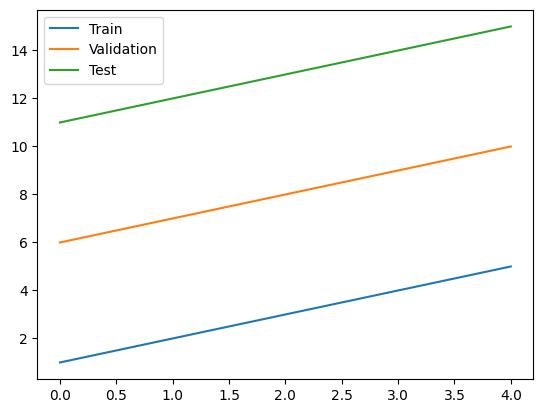

In [33]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# assuming train_data, val_data, and test_data are NumPy arrays
train_data = np.array([1, 2, 3, 4, 5])
val_data = np.array([6, 7, 8, 9, 10])
test_data = np.array([11, 12, 13, 14, 15])

# convert test_data to pandas Series
test_data = pd.Series(test_data)

# plot data splits
plt.plot(train_data, label='Train')
plt.plot(val_data, label='Validation')
plt.plot(test_data, label='Test')
plt.legend()


In [34]:
train_predict_reshaped = train_predict.reshape(-1, 1)
look_back = 100  # number of time steps to look back



19/19 [==============================] - 1s 52ms/step


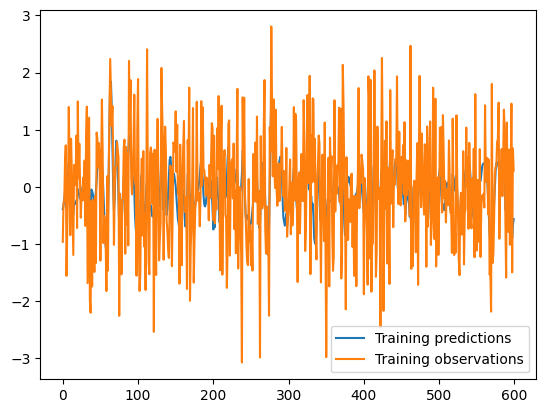

In [36]:
train_predictions = model.predict(x_train).flatten()

# Plot training data
dates_train = range(len(x_train))
plt.plot(dates_train, train_predictions, label='Training predictions')
plt.plot(dates_train, y_train, label='Training observations')
plt.legend()
plt.show()
